# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型
model = Sequential()

In [9]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [20]:
#建立模型
model2 = Sequential()

In [21]:
model2.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model2.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.1182 - val_accuracy: 0.9767
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.1211 - val_accuracy: 0.9762
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.1533 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1385 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.1147 - val_accuracy: 0.9769
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.1229 - val_accuracy: 0.9776
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.1339 - val_accuracy:

In [22]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history2 = model2.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0980 - val_accuracy: 0.9759
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0929 - val_accuracy: 0.9770
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0992 - val_accuracy: 0.9792
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.1136 - val_accuracy: 0.9747
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.1089 - val_accuracy: 0.9777
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.1193 - val_accuracy: 0.9748
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.1107 - val_accuracy:

# 以圖形顯示訓練過程

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

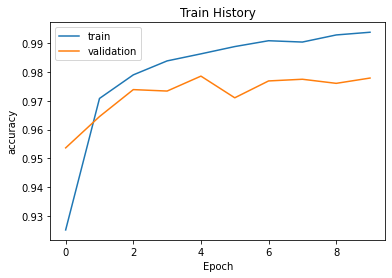

In [16]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

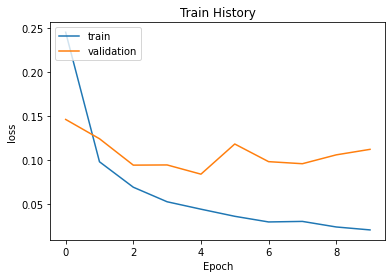

In [14]:
show_train_history(train_history, 'loss', 'val_loss')

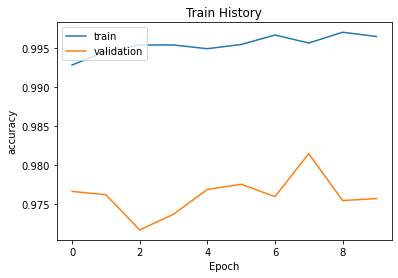

In [26]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

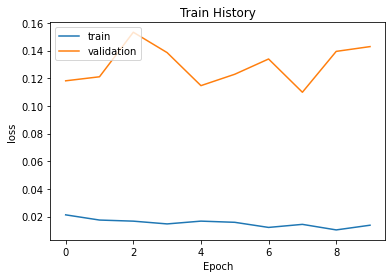

In [27]:
show_train_history(train_history, 'loss', 'val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.9791

accuracy = 0.9790999889373779


In [28]:
scores = model2.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9785

accuracy = 0.9785000085830688
